<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Взять-датасет-с-цветками-iris’а-(функция-load_iris-из-библиотеки-sklearn)" data-toc-modified-id="Взять-датасет-с-цветками-iris’а-(функция-load_iris-из-библиотеки-sklearn)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Взять датасет с цветками iris’а (функция load_iris из библиотеки sklearn)</a></span></li><li><span><a href="#Оставить-два-признака---sepal_length-и-sepal_width-и-целевую-переменную---variety" data-toc-modified-id="Оставить-два-признака---sepal_length-и-sepal_width-и-целевую-переменную---variety-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Оставить два признака - sepal_length и sepal_width и целевую переменную - variety</a></span></li><li><span><a href="#Разделить-данные-на-выборку-для-обучения-и-тестирования" data-toc-modified-id="Разделить-данные-на-выборку-для-обучения-и-тестирования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Разделить данные на выборку для обучения и тестирования</a></span></li><li><span><a href="#Построить-модель-LDA" data-toc-modified-id="Построить-модель-LDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построить модель LDA</a></span></li><li><span><a href="#Визуализировать-предсказания-для-тестовой-выборки-и-центры-классов" data-toc-modified-id="Визуализировать-предсказания-для-тестовой-выборки-и-центры-классов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализировать предсказания для тестовой выборки и центры классов</a></span></li><li><span><a href="#Отбросить-целевую-переменную-и-оставить-только-два-признака---sepal_length-и-sepal_width" data-toc-modified-id="Отбросить-целевую-переменную-и-оставить-только-два-признака---sepal_length-и-sepal_width-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Отбросить целевую переменную и оставить только два признака - sepal_length и sepal_width</a></span></li><li><span><a href="#Подберите-оптимальное-число-кластеров-для-алгоритма-kmeans-и-визуализируйте-полученную-кластеризацию" data-toc-modified-id="Подберите-оптимальное-число-кластеров-для-алгоритма-kmeans-и-визуализируйте-полученную-кластеризацию-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

### Взять датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [7]:
from sklearn.datasets import load_iris

In [48]:
iris= load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
# загружаем данные в датафрейм
Iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

### Оставить два признака - sepal_length и sepal_width и целевую переменную - variety

In [9]:
Iris_small= Iris_data[['sepal length (cm)', 'sepal width (cm)']]
variety = iris.target

In [10]:
Iris_small.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [12]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Разделить данные на выборку для обучения и тестирования

In [13]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Iris_small, variety, test_size=0.25)

### Построить модель LDA

In [17]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [18]:
lda = LinearDiscriminantAnalysis()

In [19]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [20]:
lda.predict(X_test)

array([2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1,
       2, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0])

In [21]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [151]:
result.head()

,0,1
0,1,2
1,2,2
2,0,0
3,1,2
4,0,0


In [23]:
# Исключительно ради интереса поверим количество расхождений
divergence = 0
for index, rows in result.iterrows():
         if(rows[0] != rows[1] ):
             divergence += 1
print(divergence)

8


In [24]:
from sklearn.metrics import accuracy_score

In [31]:
# расчет точности - отношение верный прогнозов к общему количеству позиций
accuracy_score(y_test, lda.predict(X_test))

0.7894736842105263

### Визуализировать предсказания для тестовой выборки и центры классов


Если честно, то не совсем понял, что тут нужно делать, поэтому сначала просто вывел визуализацию для всего тренировочного сета и всего тестового

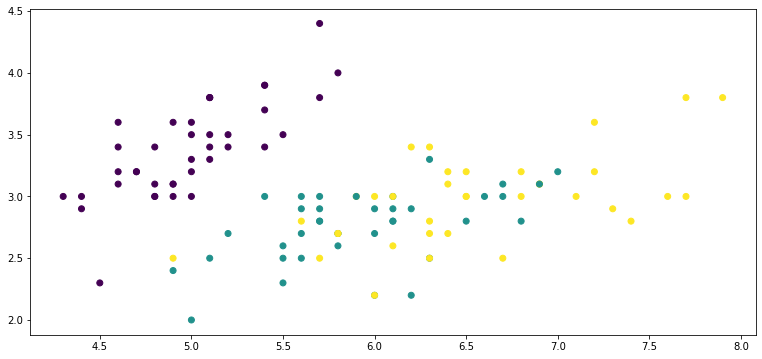

In [39]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)

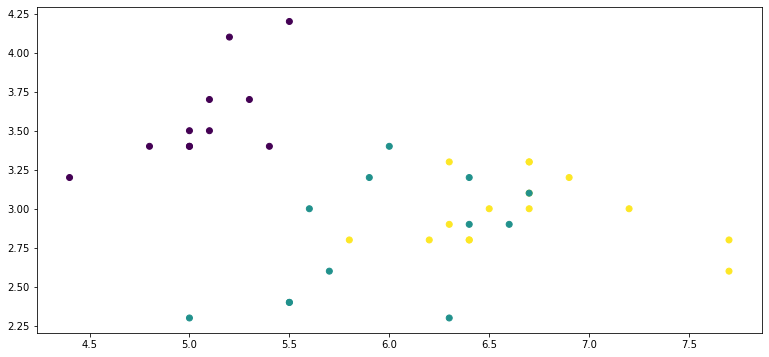

In [38]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)

**В результате видно, что надо избавиться от одного из 3 классов (либо 1, либо 2), чтобы получить хорошую границу между кластерами**

In [56]:
small_train = X_train[(y_train == 0) | (y_train == 2)] # создаем ТРЕНИРОВОЧНЫЙ малый DF, в котором для X_train оставляем только значения относящиеся к y_train == 0 и y_train == 2
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']] # убираем нафиг лишние столбцы, оставляя только 'ash' и 'flavanoids'
sy_train = y_train[(y_train == 0) | (y_train == 2)] # создаем отдельный ТРЕНИРОВОЧНЫЙ numpy массив с y = 0 или 2
small_test = X_test[(y_test == 0) | (y_test == 2)]  #создаем ТЕСТОВЫЙ малый DF, в котором для X_train оставляем только значения относящиеся к y_train == 0 и y_train == 2
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]# убираем нафиг лишние столбцы, оставляя только 'ash' и 'flavanoids'
sy_test = y_test[(y_test == 0) | (y_test == 2)] # создаем отдельный ТЕСТОВЫЙ numpy массив с y = 0 или 2

**Получаем:**

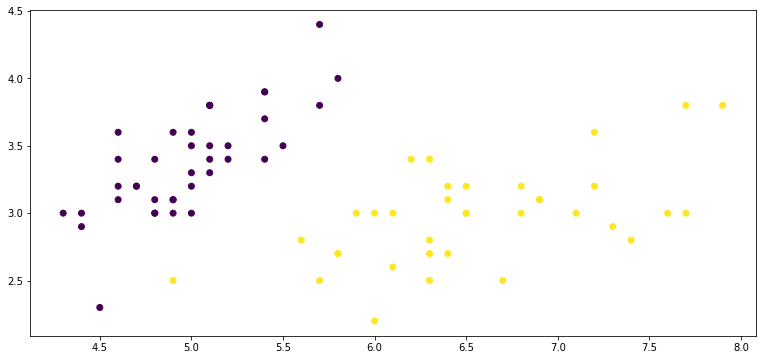

In [57]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

**Дискриминантная модель для урезанной выборки:**

In [58]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

**Центроиды:**

In [59]:
lda_small.means_

array([[4.98717949, 3.38205128],
       [6.54857143, 2.97142857]])

**Копипастим цветовую схему**

In [64]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

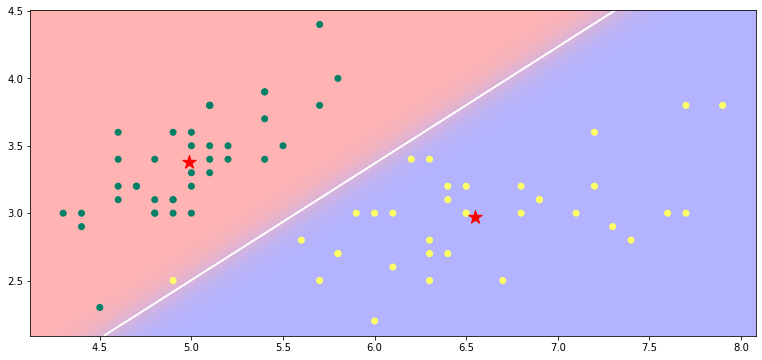

In [150]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], cmap = 'summer', c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=200, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

**А вот, что будет, если оставить все классы:**

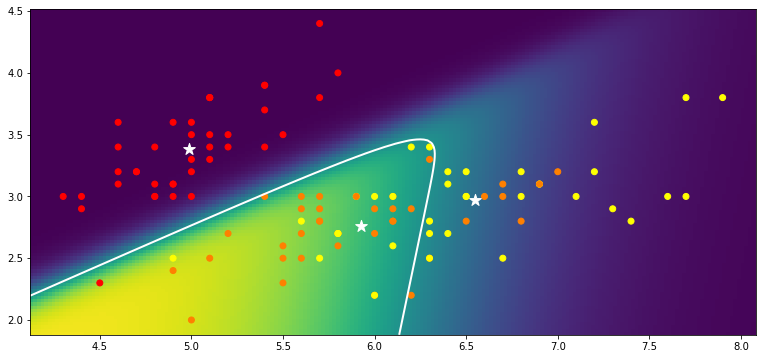

In [177]:
# сам scatter plot
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], cmap = 'autumn', c=y_train)
# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='w', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='viridis',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

**Космос!**

....

**То же самое, но с помощью логистической регрессии:**


In [166]:
from sklearn.linear_model import LogisticRegression

In [167]:
lr = LogisticRegression()

In [168]:
lr.fit(small_train, sy_train)

LogisticRegression()

In [170]:
lr.predict(small_test)

array([2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0])

In [171]:
accuracy_score(sy_test, lr.predict(small_test))

1.0

In [172]:
lr.coef_

array([[ 2.8704048 , -2.01127996]])

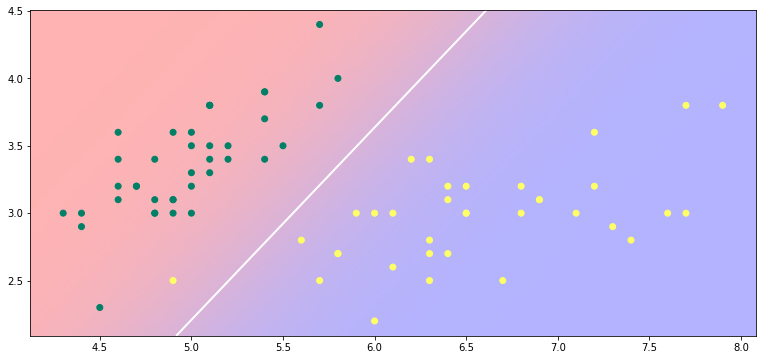

In [175]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], cmap = 'summer', c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

### Отбросить целевую переменную и оставить только два признака - sepal_length и sepal_width


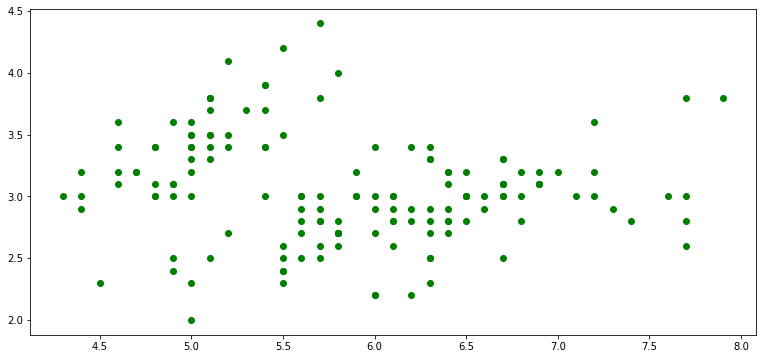

In [176]:
plt.scatter(Iris_small['sepal length (cm)'], Iris_small['sepal width (cm)'], c='g')

### Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [178]:
from sklearn.cluster import KMeans

In [199]:
# явно указываем количество кластеров
k3means = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = k3means.fit_predict(Iris_small)

In [200]:
k2means = KMeans(n_clusters=2)
clusters_2 = k2means.fit_predict(Iris_small)

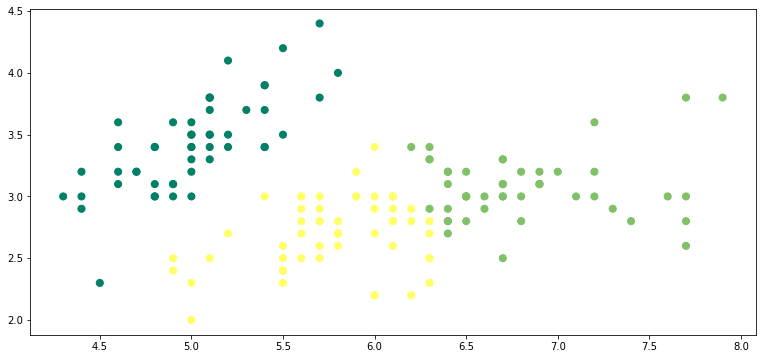

In [202]:
plt.scatter(Iris_small['sepal length (cm)'], Iris_small['sepal width (cm)'], cmap='summer', c=clusters, s=50)

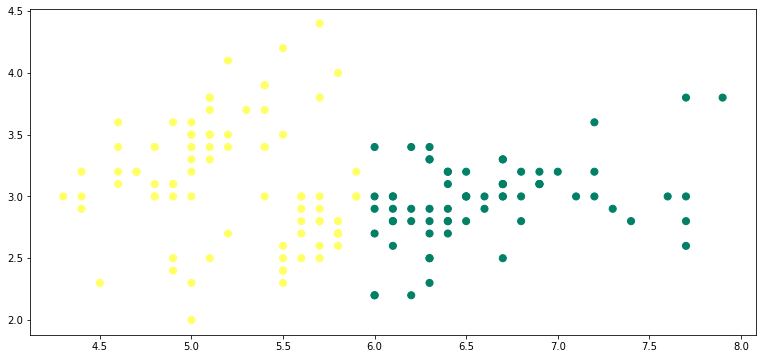

In [204]:
plt.scatter(Iris_small['sepal length (cm)'], Iris_small['sepal width (cm)'], cmap='summer', c=clusters_2, s=50)

### Выводы

**"Ничего не понятно, но очень интересно"**

Оба варианта кластеризации в целом интересны, но по факту далеки от фактического распределения, поэтому я даже и не знаю, что тут можно сказать.

Наверное, более правильным вариантом все же будет 3-х кластерный, поскольку он достаточно точно определяет границы между 0-вым и другими классами. Кроме того само разделение между 1-ым и 2-м классами также проходит по схожей с исходной классификацией логике, просто без взаимопоглощения